## DATS 6103 – Individual Project 2 – Jason Achonu
### Child Mortality
#### Data Source:World Health Organisation(WHO), World Bank

In [1]:
import numpy as np # (*) numpy for math functions and arrays
import pandas as pd # import pandas for data manipulation
import matplotlib.pyplot as plt # import matplotlib for data visualization


In [2]:
#import plotly for visulization
import plotly
import plotly.plotly as py

# (*) Useful Python/Plotly tools
import plotly.tools as tls

# (*) Graph objects to piece together plots
from plotly.graph_objs import *

# (*) To communicate with Plotly's server, sign in with credentials file
py.sign_in('jason_achonu','ixo9vrBIIf9WaqA9m8Yb') #plotly API key



print(plotly.__version__) #plotly version
plotly.offline.init_notebook_mode() #run at the start

2.2.2


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [3]:
#import the dataset for the various causes of child mortality and setting the index
# The datasets show are the number of child mortality by age, country and year for each cause
# as reported by World Health Organization (WHO)

#import HIV/AIDS dataset
HIV_AIDS = pd.read_csv('HIV-AIDS.csv', skiprows=2,usecols=[0,1,2,3])
HIV_AIDS['Cause'] = 'HIV-AIDS'
HIV_AIDS = HIV_AIDS.set_index(['Country','Cause'])

#import Diarrhoeal dataset
diarrhoeal = pd.read_csv('Diarrhoeal.csv', skiprows=2, usecols=[0,1,2,3])
diarrhoeal['Cause'] = 'diarrhoeal'
diarrhoeal = diarrhoeal.set_index(['Country','Cause'])

#import Injuries dataset
injuries = pd.read_csv('Injuries.csv', skiprows=2, usecols=[0,1,2,3])
injuries['Cause'] = 'injuries'
injuries = injuries.set_index(['Country','Cause'])

#import Malaria dataset
malaria = pd.read_csv('Malaria.csv', skiprows=2, usecols=[0,1,2,3])
malaria['Cause'] = 'malaria'
malaria = malaria.set_index(['Country','Cause'])

#import Measles dataset
measles = pd.read_csv('Measles.csv', skiprows=2, usecols=[0,1,2,3])
measles['Cause'] = 'measles'
measles = measles.set_index(['Country','Cause'])

#import Meningitis dataset
meningitis = pd.read_csv('Meningitis.csv', skiprows=2, usecols=[0,1,2,3])
meningitis['Cause'] = 'meningitis'
meningitis = meningitis.set_index(['Country','Cause'])

#import noncommunicable diseases dataset
noncommunicable_diseases = pd.read_csv('noncommunicable diseases.csv', skiprows=2, usecols=[0,1,2,3])
noncommunicable_diseases['Cause'] = 'Noncommunicable diseases'
noncommunicable_diseases = noncommunicable_diseases.set_index(['Country','Cause'])

#import perinatal and nutritional conditions dataset
perinatal_nutritional_conditions = pd.read_csv('perinatal and nutritional conditions.csv', skiprows=2, usecols=[0,1,2,3])
perinatal_nutritional_conditions['Cause']='Perinatal nutritional_conditions'
perinatal_nutritional_conditions = perinatal_nutritional_conditions.set_index(['Country','Cause'])

#import Pertussis dataset
Pertussis = pd.read_csv('Pertussis.csv', skiprows=2, usecols=[0,1,2,3])
Pertussis['Cause'] = 'Pertussis'
Pertussis = Pertussis.set_index(['Country','Cause'])

#import Pertussis dataset
Prematurity = pd.read_csv('Prematurity.csv', skiprows=2, usecols=[0,1,2,3])
Prematurity['Cause'] = 'Prematurity'
Prematurity = Prematurity.set_index(['Country','Cause'])

#import respiratory infections dataset
respiratory_infections = pd.read_csv('respiratory infections.csv', skiprows=2, usecols=[0,1,2,3])
respiratory_infections['Cause'] = 'Respiratory infections'
respiratory_infections = respiratory_infections.set_index(['Country','Cause'])

#import Sepsis dataset
Sepsis = pd.read_csv('Sepsis.csv',  skiprows=2, usecols=[0,1,2,3])
Sepsis['Cause']='Sepsis'
Sepsis = Sepsis.set_index(['Country','Cause'])

#import Birth asphyxia and birth trauma dataset
Birth_asphyxia_birth_trauma = pd.read_csv('Birth asphyxia and birth trauma.csv',  skiprows=2, usecols=[0,1,2,3])
Birth_asphyxia_birth_trauma['Cause'] = 'Birth asphyxia birth trauma'
Birth_asphyxia_birth_trauma = Birth_asphyxia_birth_trauma.set_index(['Country','Cause'])

#import Congenital anomalies dataset
congenital_anomalies = pd.read_csv('Congenital anomalies.csv', skiprows=2,usecols=[0,1,2,3])
congenital_anomalies['Cause'] = 'Congenital anomalies'
congenital_anomalies = congenital_anomalies.set_index(['Country','Cause'])



In [4]:
#Concatenate various cause of child mortality into all_causes
merge_cause = [congenital_anomalies,   Birth_asphyxia_birth_trauma,  Sepsis, 
               respiratory_infections, injuries, malaria,  meningitis, 
               noncommunicable_diseases, perinatal_nutritional_conditions,  
              Pertussis, Prematurity, measles, HIV_AIDS, diarrhoeal ]

all_causes = pd.concat(merge_cause, axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True)

In [5]:
all_causes.shape

(43456, 3)

##  What is the number of child mortality by age range

In [6]:
#Select the different age range columns

age = all_causes.iloc[:,[0,1,2]]

In [7]:
#Grouping and summing age by year

age_range = age.groupby('Year').sum()

In [8]:
age_range

,0-27 days,1-59 months
Year,,
2000,3750216,6050058
2001,3681596,5878695
2002,3600471,5598700
2003,3513529,5468454
2004,3421391,5208520
2005,3336158,4974616
2006,3251370,4700952
2007,3173755,4456926
2008,3101168,4318919


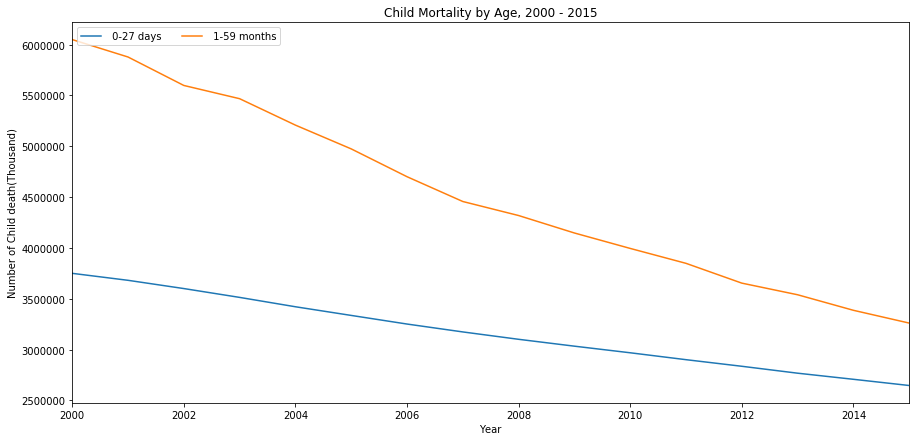

In [9]:
# plot line chart - Child mortality by age, 2000 - 2015
age_range_Plot = age_range.plot.line(legend=True,
                                             figsize=(15,7),                                         
                                              title='Child Mortality by Age, 2000 - 2015')
age_range_Plot.set_ylabel('Number of Child death(Thousand)')
age_range_Plot.set_xlabel('Year')
age_range_Plot.legend(loc=2, ncol=2)

plt.show()

##  Number of Death by Cause

In [10]:
all_causes.head()

Year   0-27 days   1-59 months
Country     Cause                                               
Afghanistan Congenital anomalies  2015        2299          2348
            Congenital anomalies  2014        2293          2442
            Congenital anomalies  2013        2315          2405
            Congenital anomalies  2012        2350          2495
            Congenital anomalies  2011        2406          2587

In [11]:
# Reseting the index for all_causes
all_causes = all_causes.reset_index()

In [12]:
all_causes = all_causes.set_index(['Country','Cause','Year'])

In [13]:
# Calculate total number of death 
all_causes['Total'] = all_causes.sum(axis=1)

In [14]:
all_causes.head()

0-27 days   1-59 months  Total
Country     Cause                Year                                 
Afghanistan Congenital anomalies 2015        2299          2348   4647
                                 2014        2293          2442   4735
                                 2013        2315          2405   4720
                                 2012        2350          2495   4845
                                 2011        2406          2587   4993

In [15]:
all_causes = all_causes.reset_index()

In [16]:
#Setting index for all_causes
causes_by_year = all_causes.set_index(['Country','Cause','Year'])

In [17]:
causes_by_year_pivot =causes_by_year


In [18]:
causes_by_year_pivot = causes_by_year_pivot.reset_index()

In [19]:
#subsetting to select only causes, year and Total death
causes_by_year_pivot = causes_by_year_pivot.loc[:,['Cause','Year','Total']]


In [20]:
#group total by Cause and year
causes_by_year_pivot = causes_by_year_pivot.groupby(['Cause','Year']).sum()

In [21]:
causes_by_year_pivot = causes_by_year_pivot.reset_index()

In [22]:
# Pivot table to set year as index , cause as column and total as values
causes_by_year_pivot = causes_by_year_pivot.pivot(index='Year', columns='Cause', values='Total')

In [23]:
causes_by_year_pivot

Cause,Birth asphyxia birth trauma,Congenital anomalies,HIV-AIDS,Noncommunicable diseases,Perinatal nutritional_conditions,Pertussis,Prematurity,Respiratory infections,Sepsis,diarrhoeal,injuries,malaria,measles,meningitis
Year,,,,,,,,,,,,,,
2000,1120138,573958,222329,339272,735895,59182,1338776,1732035,538637,1212210,433919,725282,484824,283817
2001,1094856,568784,228765,332912,716659,59738,1318464,1676111,534362,1144236,423505,710703,470792,280404
2002,1064290,562704,232037,325093,696151,60309,1293467,1606929,529675,1078967,414006,700489,364903,270151
2003,1029981,552879,232565,316736,671542,59997,1267551,1542074,523796,1008460,402342,684443,421406,268211
2004,994531,546908,229734,311381,649068,60000,1240400,1488128,517290,949526,427649,648313,315099,251884
2005,959760,538924,224155,305117,625870,59935,1218031,1430145,510254,891132,388786,615132,295898,247635
2006,927322,533999,216414,301150,609327,59938,1194923,1387318,502484,843427,385569,586955,189858,213638
2007,896404,527487,204663,297237,593243,60235,1175708,1330568,497009,797075,380972,546639,120109,203332
2008,866207,520636,187765,291810,578275,60466,1156461,1279748,491710,750676,397542,501551,127855,209385


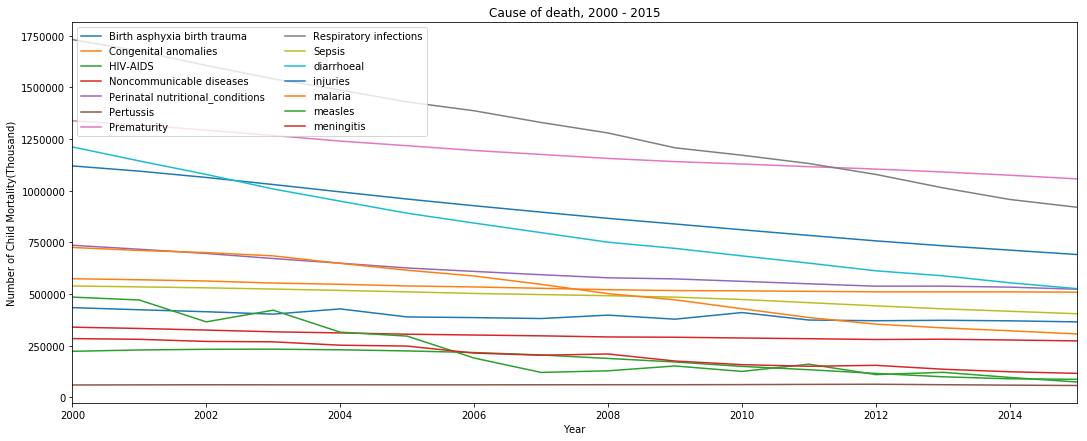

In [24]:
#plot line chart - cause of death

all_causes_Plot = causes_by_year_pivot.plot.line(legend=True,
                                             figsize=(18,7),                                         
                                              title='Cause of death, 2000 - 2015')
all_causes_Plot.set_ylabel('Number of Child Mortality(Thousand)')
all_causes_Plot.set_xlabel('Year')
all_causes_Plot.legend(loc=2, ncol=2)

plt.show()

##  Lead cause of Child Mortality

In [25]:

Total_death_by_cause =causes_by_year_pivot.sum(axis=0)
Total_death_by_cause = Total_death_by_cause.sort_values(ascending=True)

#function to plot the Lead cause in bar chart
def plot_cause(data):
    data = data
    data.plot(kind='barh', stacked=False,legend=False, sort_columns=True,figsize=(13, 6))
    plt.ylabel('Cause')
    plt.xlabel('Number of death(Million)')
    
    plt.ticklabel_format(style='plain', axis='x')
    plt.title('Lead cause of Child Mortality')
    plt.show()

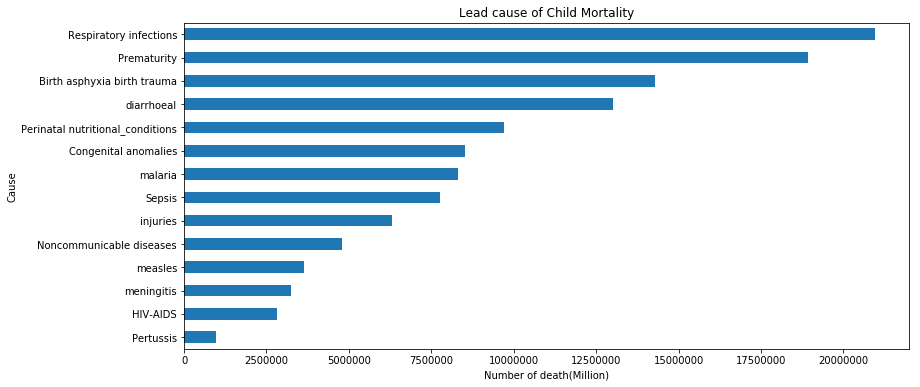

In [26]:
plot_cause(Total_death_by_cause)

##  Cause of Death by Age range

In [27]:
cause_age_range  = causes_by_year 

In [28]:
#grouping and summing age by causes
cause_age_range = age.groupby('Cause').sum(axis= None)
cause_age_range = cause_age_range.reset_index()

In [29]:
cause_age_range

,Cause,Year,0-27 days,1-59 months
0,Birth asphyxia birth trauma,6231280,13383657,897394
1,Congenital anomalies,6231280,4944027,3565457
2,HIV-AIDS,6231280,25633,2795899
3,Noncommunicable diseases,6231280,93729,4697713
4,Perinatal nutritional_conditions,6231280,2880472,6810806
5,Pertussis,6231280,43178,918779
6,Prematurity,6231280,17038242,1880771
7,Respiratory infections,6231280,3474540,17481237
8,Sepsis,6231280,7676959,75105
9,diarrhoeal,6231280,443009,12567575


In [30]:
#drop the year column
cause_age_range = cause_age_range.drop(['Year'], axis=1)

In [31]:
cause_age_range

,Cause,0-27 days,1-59 months
0,Birth asphyxia birth trauma,13383657,897394
1,Congenital anomalies,4944027,3565457
2,HIV-AIDS,25633,2795899
3,Noncommunicable diseases,93729,4697713
4,Perinatal nutritional_conditions,2880472,6810806
5,Pertussis,43178,918779
6,Prematurity,17038242,1880771
7,Respiratory infections,3474540,17481237
8,Sepsis,7676959,75105
9,diarrhoeal,443009,12567575


In [32]:
cause_range = cause_age_range

In [33]:
cause_range

,Cause,0-27 days,1-59 months
0,Birth asphyxia birth trauma,13383657,897394
1,Congenital anomalies,4944027,3565457
2,HIV-AIDS,25633,2795899
3,Noncommunicable diseases,93729,4697713
4,Perinatal nutritional_conditions,2880472,6810806
5,Pertussis,43178,918779
6,Prematurity,17038242,1880771
7,Respiratory infections,3474540,17481237
8,Sepsis,7676959,75105
9,diarrhoeal,443009,12567575


In [34]:
# set cause as index
cause_range = cause_range.set_index('Cause')

In [35]:
#function to plot pie chart for cause of death by age range
def cause_age_range_pie_chart(data,title):
    data = data
    data.plot.pie(figsize=(12, 12), subplots=True, legend = False, autopct='%.2f%%',
                                                 fontsize=10)
    plt.title(title)
    plt.show()

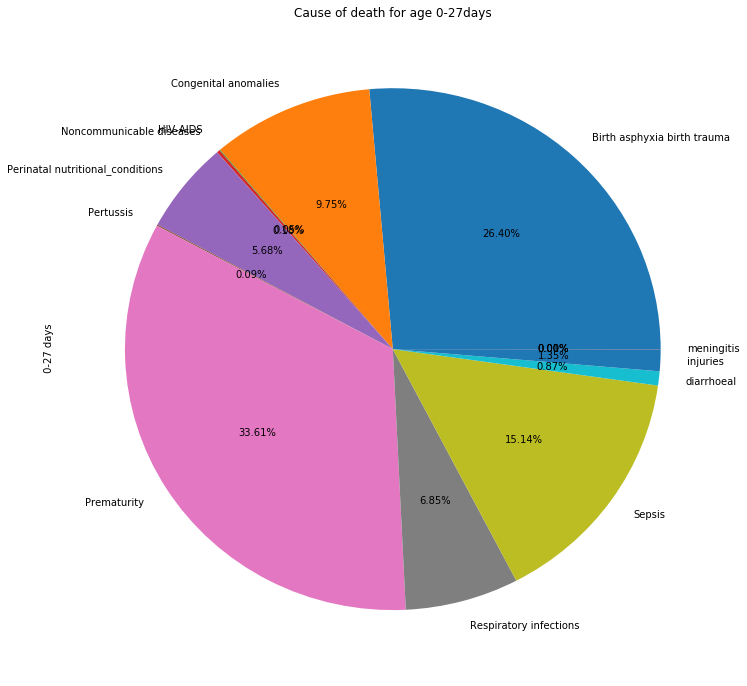

In [36]:
cause_age_range_pie_chart(cause_range.loc[:, [' 0-27 days']], 'Cause of death for age 0-27days')

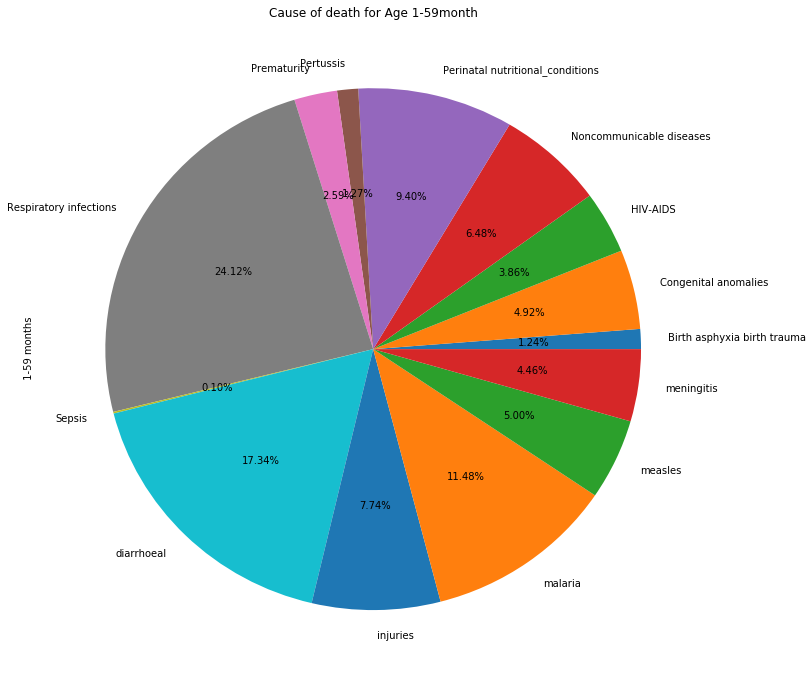

In [37]:
cause_age_range_pie_chart(cause_range.loc[:, [' 1-59 months']], 'Cause of death for Age 1-59month')

##  Total Death by Country

In [38]:
#import the dataset containing details of countries
country =  pd.read_excel('country.xlsx', sheetname='data',  index_col=0 
                                  )
country.head()

,Continent,Country Code
Country,,
Afghanistan,Asia,AFG
Albania,Europe,ALB
Algeria,Africa,DZA
Andorra,Europe,AND
Angola,Africa,AGO


In [39]:
#Group all_cause by country
cause_by_country = all_causes.groupby('Country').sum()
cause_by_country.head()

,Year,0-27 days,1-59 months,Total
Country,,,,
Afghanistan,449680,645037,1215895,1860932
Albania,449680,5566,6937,12503
Algeria,449680,219783,156757,376540
Andorra,449680,2,5,7
Angola,449680,747906,1965448,2713354


In [40]:
#Sort by total
cause_by_country = cause_by_country.sort_values(by='Total', ascending=False)
cause_by_country.head()

,Year,0-27 days,1-59 months,Total
Country,,,,
India,449680,15035408,13950613,28986021
Nigeria,449680,3711762,10012529,13724291
Pakistan,449680,3818845,3304839,7123684
China,449680,3132123,2413252,5545375
Democratic Republic of the Congo,449680,1422786,3767270,5190056


In [41]:
#Merge the cause_by_country with country dataset
cause_by_country= pd.merge(cause_by_country,country, left_index=True, right_index=True, how='outer')

In [42]:
#sort by Total
total_death_by_country = cause_by_country.sort_values(by='Total', ascending=False)

In [43]:
# reset index
total_death_by_country = total_death_by_country.reset_index()
total_death_by_country

,Country,Year,0-27 days,1-59 months,Total,Continent,Country Code
0,India,449680,15035408,13950613,28986021,Asia,IND
1,Nigeria,449680,3711762,10012529,13724291,Africa,NGA
2,Pakistan,449680,3818845,3304839,7123684,Asia,PAK
3,China,449680,3132123,2413252,5545375,Asia,CHN
4,Democratic Republic of the Congo,449680,1422786,3767270,5190056,Africa,COD
5,Ethiopia,449680,1691998,2759278,4451276,Africa,ETH
6,Bangladesh,449680,1730393,1511870,3242263,Asia,BGD
7,Indonesia,449680,1314167,1595628,2909795,Asia,IDN
8,Angola,449680,747906,1965448,2713354,Africa,AGO
9,United Republic of Tanzania,449680,641409,1436487,2077896,Africa,TZA


In [44]:
# Code to plot world map show the total death in each country
data = [ dict(
        type = 'choropleth',
        locations = total_death_by_country['Country Code'],
        z = total_death_by_country['Total'],
        text = total_death_by_country['Country'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            #tickprefix = '$',
            title = 'Total Death<br>(Millions)'),
      ) ]

layout = dict(
    title = 'Number of Death by Country, 2000 - 2015',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map-jack-a' )

## Top 30 countries of child mortality

In [45]:
## Question 6 Top 30 countries

In [46]:
Top30_countries = total_death_by_country

In [47]:
# Sort for the top countries
Top30_countries_sorted = Top30_countries.sort_values(by = 'Total', ascending= False)
Top30_countries_sorted = Top30_countries_sorted.set_index('Country')

In [48]:
# subsetting and reset index
Top30_countries_sorted = Top30_countries_sorted.iloc[:,-3]
Top30_countries_sorted = Top30_countries_sorted.reset_index()

In [49]:
Top30_countries_sorted = Top30_countries_sorted.set_index('Country')

In [50]:
# plot bar chart in Horinzotal for top 20 or 10

#function to plot the  bar chart

def plot_Top30_countries(data, limit=20):
    data = data.loc[:, ['Total']][:limit]
    data.plot(kind='barh', stacked=False,legend=False, sort_columns=True,figsize=(13, 6))

    #used this to remove the scientific notation
    plt.ticklabel_format(style='plain', axis='x')
    
    plt.ylabel('Country')
    plt.xlabel('Number of Death (Million)')
    plt.title('Top '+ str(limit) +' Countries of Child Mortality')
    plt.show()

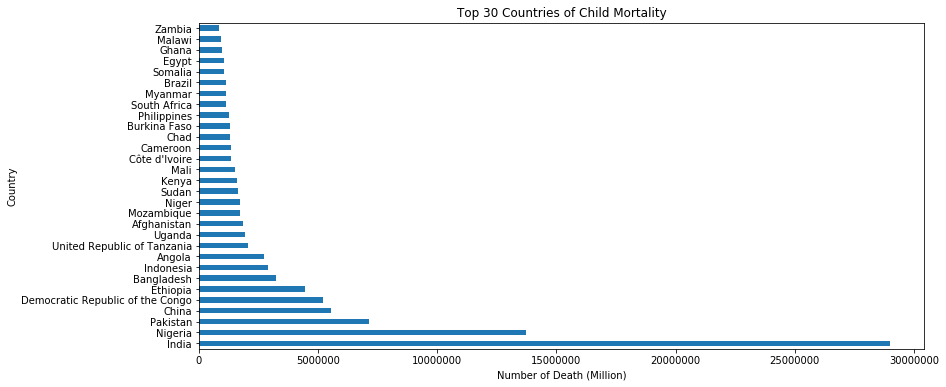

In [51]:
plot_Top30_countries(Top30_countries_sorted,30)



##  What is the major causes of Child mortality for the top 7 countries

In [52]:
Top_countries = age

In [53]:
Top_countries.head(10)

Year   0-27 days   1-59 months
Country     Cause                                               
Afghanistan Congenital anomalies  2015        2299          2348
            Congenital anomalies  2014        2293          2442
            Congenital anomalies  2013        2315          2405
            Congenital anomalies  2012        2350          2495
            Congenital anomalies  2011        2406          2587
            Congenital anomalies  2010        2457          2660
            Congenital anomalies  2009        2461          2703
            Congenital anomalies  2008        2461          2517
            Congenital anomalies  2007        2449          2544
            Congenital anomalies  2006        2421          2563

In [54]:
Top_countries = Top_countries.reset_index()

In [55]:
Top_countries = Top_countries.set_index(['Country','Cause','Year'])

In [56]:
#Calculation for the total number of death
Top_countries['Total'] = Top_countries.sum(axis = 1)

In [57]:
#grouping the total number number of death by country and cause
Top_countries_causes = Top_countries.groupby(['Country','Cause']).sum(axis= None)

In [58]:
#reset index
Top_countries_causes = Top_countries_causes.reset_index()

In [59]:
top7_countries = Top_countries_causes.pivot(index = 'Country', columns='Cause', values='Total')

In [60]:
top7_countries.head()

Cause,Birth asphyxia birth trauma,Congenital anomalies,HIV-AIDS,Noncommunicable diseases,Perinatal nutritional_conditions,Pertussis,Prematurity,Respiratory infections,Sepsis,diarrhoeal,injuries,malaria,measles,meningitis
Country,,,,,,,,,,,,,,
Afghanistan,204330,77302,476,94097,163482,22015,225470,425478,120961,280671,112546,1969,58616,73519
Albania,875,2986,13,1264,733,67,2563,1987,386,247,1107,0,8,267
Algeria,49140,53345,244,24309,22615,2412,87329,52506,28914,23348,21224,0,7028,4126
Andorra,0,6,0,0,0,0,1,0,0,0,0,0,0,0
Angola,273015,125692,34990,100007,290379,14930,291364,536539,119403,481799,115480,242195,22680,64881


In [61]:
#transpose
top7_countries_transpose  = top7_countries.transpose()

In [62]:
top7_countries_transpose.head()

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
Cause,,,,,,,,,,,,,,,,,,,,,
Birth asphyxia birth trauma,204330,875,49140,0,273015,37,8969,1122,2287,327,...,229650,21871,646,62720,234,14802,46254,95115,83204,58554
Congenital anomalies,77302,2986,53345,6,125692,60,49581,3112,6146,1824,...,111627,121335,3170,55477,465,30173,119708,44954,38427,34008
HIV-AIDS,476,13,244,0,34990,0,407,50,4,2,...,184254,171,20,1794,0,495,3575,452,97659,163211
Noncommunicable diseases,94097,1264,24309,0,100007,41,20952,1019,3497,689,...,59770,63844,1174,24965,164,7792,51683,42337,26394,21064
Perinatal nutritional_conditions,163482,733,22615,0,290379,20,11879,929,3063,443,...,189395,47863,589,48152,147,12038,34660,57405,77775,63122


In [63]:
#pie chart for causes of death for each country
def plot_top7_list_bar_chart(data,title):
    
    data.plot(kind='bar', stacked=False,legend=False, sort_columns=True, figsize=(13, 6))
    plt.ylabel('Number of mortality')
    plt.title('Number of Child Mortality by cause'+ str(title))
    plt.show()

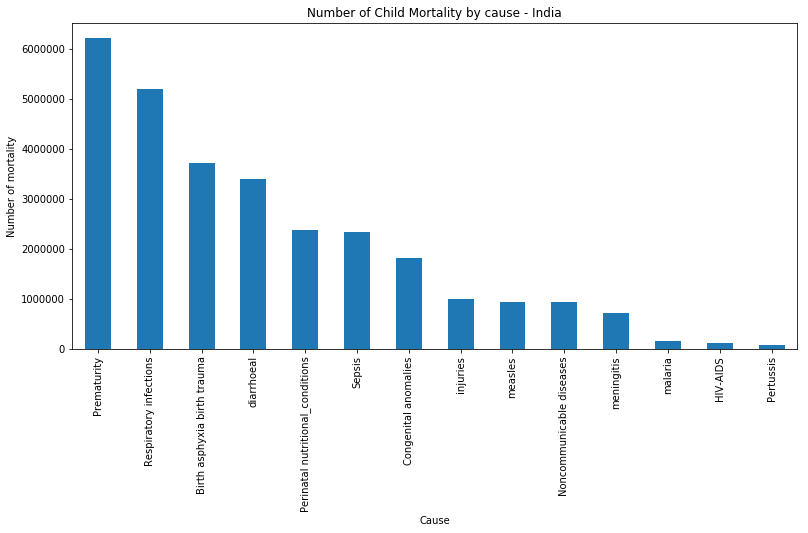

In [64]:
#India
plot_top7_list_bar_chart(top7_countries_transpose.loc[:, ['India']].sort_values(by='India',ascending=False),' - India' )

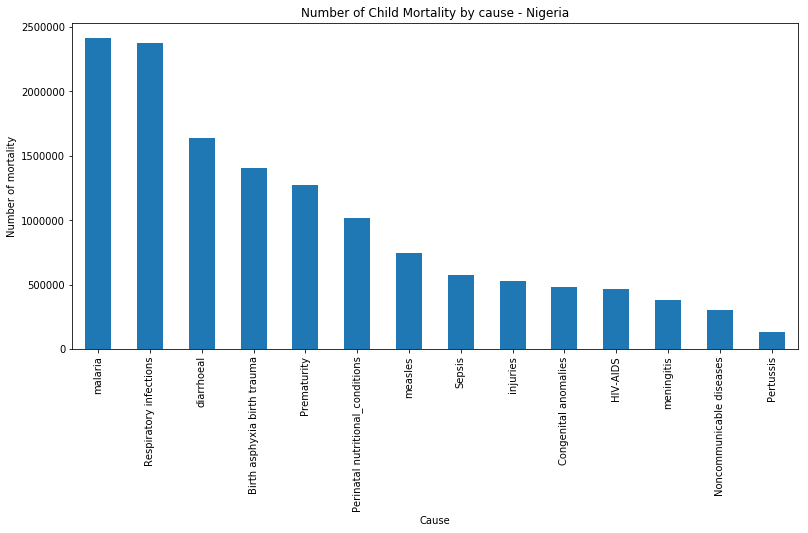

In [65]:
#Nigeria
plot_top7_list_bar_chart(top7_countries_transpose.loc[:, ['Nigeria']].sort_values(by='Nigeria',ascending=False),' - Nigeria' )

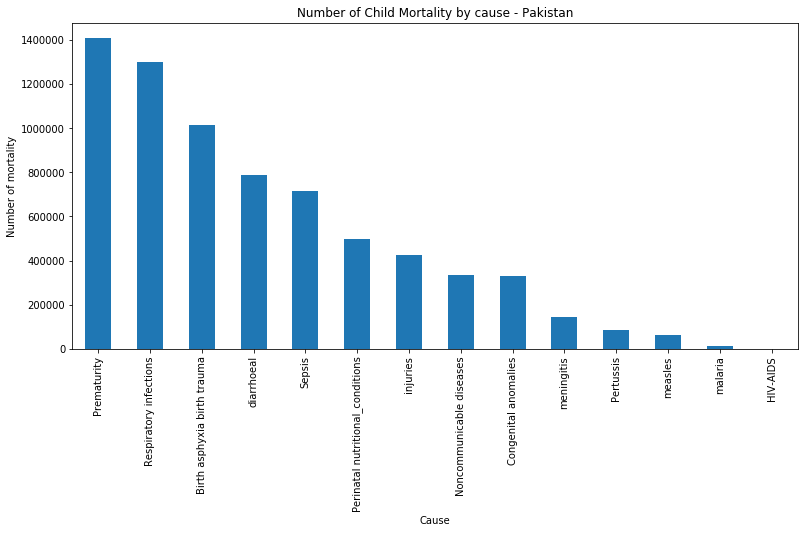

In [66]:
#Pakistan
plot_top7_list_bar_chart(top7_countries_transpose.loc[:, ['Pakistan']].sort_values(by='Pakistan',ascending=False),' - Pakistan' )

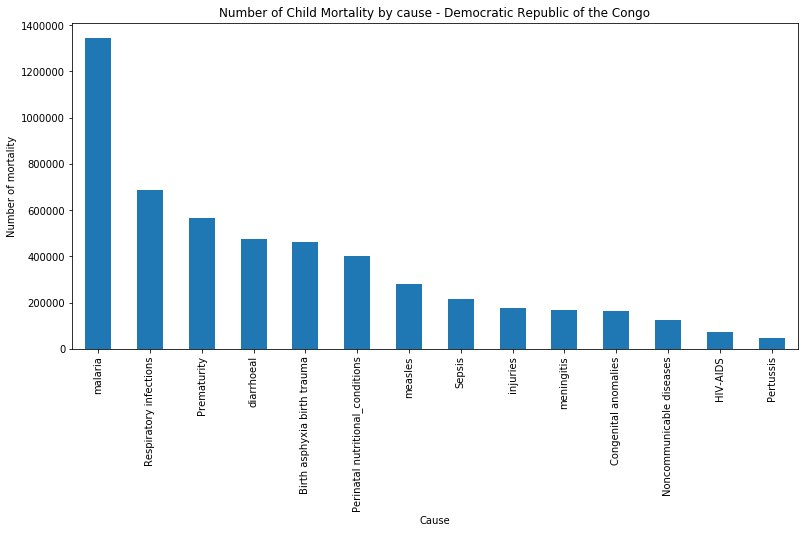

In [67]:
#D.R Congo
plot_top7_list_bar_chart(top7_countries_transpose.loc[:, ['Democratic Republic of the Congo']].sort_values(by='Democratic Republic of the Congo',ascending=False),' - Democratic Republic of the Congo' )

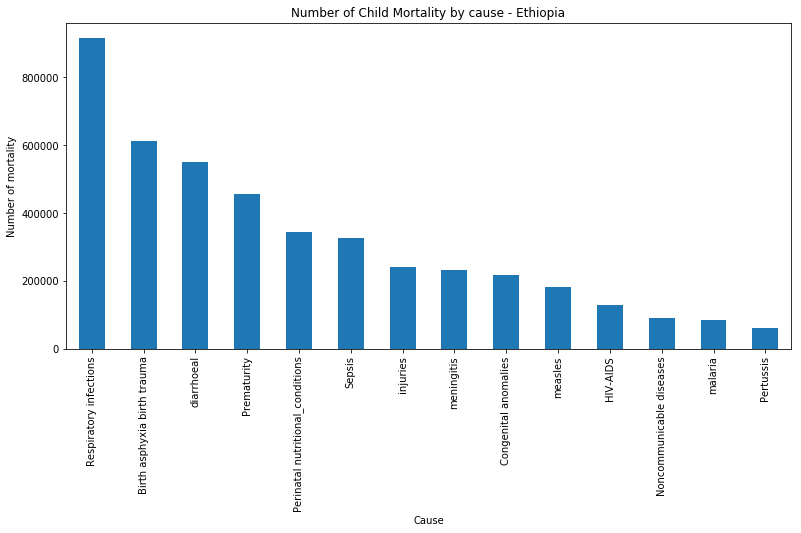

In [68]:
#Ethiopia
plot_top7_list_bar_chart(top7_countries_transpose.loc[:, ['Ethiopia']].sort_values(by='Ethiopia',ascending=False),' - Ethiopia')

## Reduction rate in Child Mortality 

In [69]:
#Setting index for all_causes
all_causes.head()

,Country,Cause,Year,0-27 days,1-59 months,Total
0,Afghanistan,Congenital anomalies,2015,2299,2348,4647
1,Afghanistan,Congenital anomalies,2014,2293,2442,4735
2,Afghanistan,Congenital anomalies,2013,2315,2405,4720
3,Afghanistan,Congenital anomalies,2012,2350,2495,4845
4,Afghanistan,Congenital anomalies,2011,2406,2587,4993


In [70]:

reduction_rate = all_causes.set_index(['Country','Cause','Year'])


reduction_rate_pivot =reduction_rate

reduction_rate_pivot = reduction_rate_pivot.reset_index()

reduction_rate_pivot = reduction_rate_pivot.groupby(['Country','Year']).sum()

In [71]:


#subsetting to select only causes, year and Total death
reduction_rate_pivot = reduction_rate_pivot.loc[:,['Total']]


In [72]:
reduction_rate_pivot.head()

Total
Country     Year        
Afghanistan 2000  128036
            2001  133246
            2002  127300
            2003  121623
            2004  122186

In [73]:
reduction_rate_pivot = reduction_rate_pivot.reset_index()
# Pivot table to set year as index , cause as column and total as values
reduction_rate_pivot = reduction_rate_pivot.pivot(index='Country', columns='Year', values='Total')

In [74]:
reduction_rate_pivot['Reduction Rate'] = (reduction_rate_pivot.loc[:,2000] - reduction_rate_pivot.loc[:,2015])/reduction_rate_pivot.loc[:,2000]



In [75]:
reduction_rate_pivot['Reduction Rate Percentage'] = reduction_rate_pivot['Reduction Rate'] * 100

In [76]:
reduction_rate_pivot['Fixed Value'] = (reduction_rate_pivot.loc[:,2000] - reduction_rate_pivot.loc[:,2015])




In [77]:
#Code to sort for the fastest growing countries in percentage value
reduction_rate_pivot_sorted = reduction_rate_pivot.sort_values(by='Fixed Value', ascending=False)
reduction_rate_pivot_sorted.head(10)

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Reduction Rate,Reduction Rate Percentage,Fixed Value
Country,,,,,,,,,,,,,,,,,,,
India,2457637,2391566,2291046,2209226,2124830,2003981,1947788,1843665,1763737,1693446,1585284,1498417,1401540,1319303,1259210,1195345,0.513620,51.362020,1262292
China,581958,551823,518016,480872,442006,405127,369857,335156,302636,273727,251333,233657,219430,205366,192940,181471,0.688172,68.817165,400487
Nigeria,995546,970904,911154,1006319,901318,961054,848029,832721,828458,803469,799896,801034,774242,794342,751809,743996,0.252675,25.267542,251550
Ethiopia,405977,387132,385813,363051,338269,313999,297545,264470,255618,242460,220609,205508,198035,192869,197426,182495,0.550479,55.047946,223482
Bangladesh,313119,297300,280211,265459,260384,243938,223323,194537,181862,167488,156201,148234,137350,130121,123823,118913,0.620231,62.023065,194206
Indonesia,236806,224706,212360,205208,228892,199007,195057,173071,161348,160664,154859,155436,152940,151897,150627,146917,0.379589,37.958920,89889
Uganda,167348,161181,161789,153940,138898,133096,127235,121220,115268,110020,105219,99919,93733,90037,86797,85138,0.491252,49.125176,82210
United Republic of Tanzania,172470,166521,161133,155795,150126,144152,137617,130384,123338,117273,110953,105956,103205,101789,99194,97990,0.431843,43.184322,74480
Brazil,121542,112256,102788,93410,84488,75905,68025,61178,55050,50451,47835,46871,47447,49092,51112,52412,0.568775,56.877458,69130


In [78]:
#Code to sort for the fastest growing countries in percentage value
reduction_rate_pivot_sorted_percent = reduction_rate_pivot.sort_values(by='Reduction Rate Percentage', ascending=False)
reduction_rate_pivot_sorted_percent.head(10)



Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Reduction Rate,Reduction Rate Percentage,Fixed Value
Country,,,,,,,,,,,,,,,,,,,
Andorra,2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1.000000,100.000000,2
Rwanda,60678,59457,54547,47426,40440,35525,31970,29194,27074,25252,23312,21045,18766,16832,15186,14178,0.766340,76.634035,46500
Maldives,281,239,221,180,177,141,128,116,107,100,91,86,80,77,70,68,0.758007,75.800712,213
Estonia,135,131,128,118,114,110,105,96,89,82,72,67,57,48,42,36,0.733333,73.333333,99
Romania,7020,6798,6291,5588,4912,4365,3955,3670,3437,3237,3009,2776,2495,2248,2030,1881,0.732051,73.205128,5139
Cambodia,35385,31502,27744,25019,23147,21796,20743,19746,19060,18033,16271,14773,13216,11955,11001,10241,0.710584,71.058358,25144
Montenegro,114,109,103,98,90,87,78,72,67,62,55,49,44,40,37,34,0.701754,70.175439,80
Tuvalu,13,11,10,8,6,5,5,5,5,5,5,5,5,5,5,4,0.692308,69.230769,9
China,581958,551823,518016,480872,442006,405127,369857,335156,302636,273727,251333,233657,219430,205366,192940,181471,0.688172,68.817165,400487


In [79]:
#function to plot  horizontal bar plot for reduction rate in fixed value

def plot_reduction_rate(data,xlabel,title, limit=20):
    data = data.loc[:,'Fixed Value'][:limit]
    data.plot(kind='barh', stacked=False,legend=False, sort_columns=True,figsize=(13, 6))

    #used this to remove the scientific notation
    #plt.ticklabel_format(style='plain', axis='x')
    
    plt.ylabel('Country')
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()
    
    

In [80]:
#function to plot  horizontal bar plot for reduction rate

def plot_reduction_rate_percent(data,xlabel,title, limit=20):
    data = data.loc[:,'Reduction Rate Percentage'][:limit]
    data.plot(kind='barh', stacked=False,legend=False, sort_columns=True,figsize=(13, 6))
    plt.ylabel('Country')
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()
    



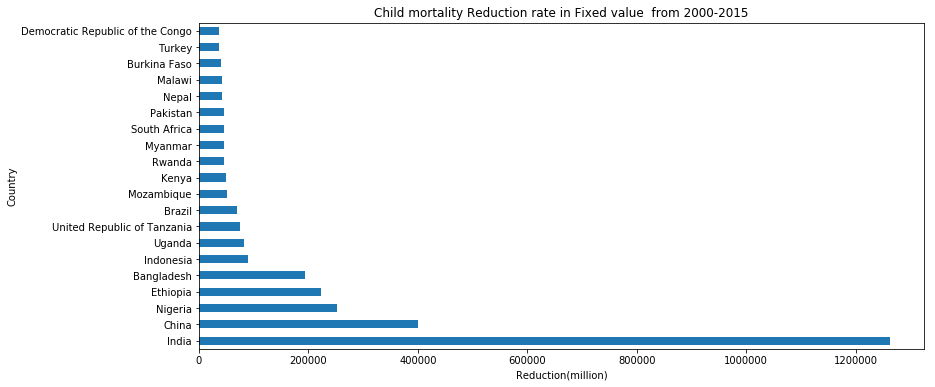

In [81]:
#plot_growth_military_spending(G20MilitaryExpenditure_sorted.loc[:,'Fixed Value'],'Amount(US$ million)','Military Spending growth in Fixed value  from 2007-2016' )


plot_reduction_rate(reduction_rate_pivot_sorted,'Reduction(million)','Child mortality Reduction rate in Fixed value  from 2000-2015' )

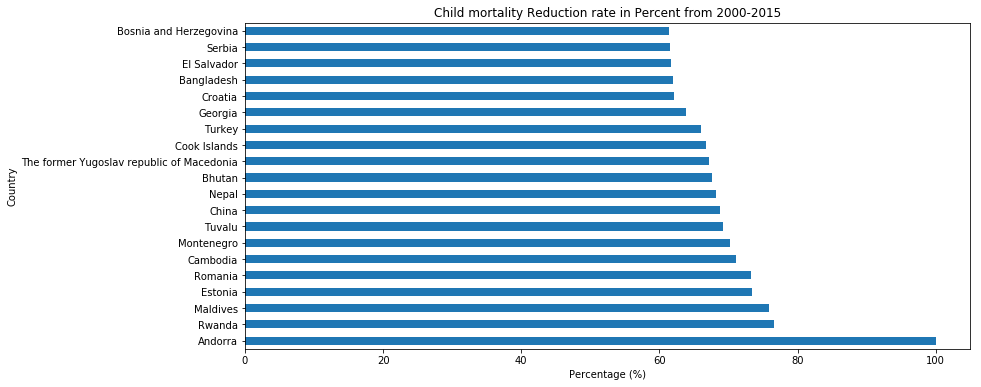

In [82]:
#plot_growth_military_spending(G20MilitaryExpenditure_sorted.loc[:,'Fixed Value'],'Amount(US$ million)','Military Spending growth in Fixed value  from 2007-2016' )


plot_reduction_rate_percent(reduction_rate_pivot_sorted_percent,'Percentage (%)','Child mortality Reduction rate in Percent from 2000-2015' )

##  Child Mortality vs GDP Per Capita





In [83]:
#import population and GDP per capita income

population =  pd.read_excel('API_SP.POP.TOTL_DS2_en_excel_v2.xls', sheetname='Data', skiprows=3 # index_col=0 
                                  )

GDP_per_capital =  pd.read_excel('API_NY.GDP.PCAP.CD_DS2_en_excel_v2.xls', sheetname='Data',skiprows=3 # index_col=0 
                                  )

#'Country Code',

In [84]:
#list of columns
cols =['Country Name','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']

In [85]:

country_code_list = country['Country Code']


In [86]:
country_code_list = country_code_list.reset_index()

In [87]:
country_code_list= list(country['Country Code'])

In [88]:
#set Country code as index
GDP_per_capital = GDP_per_capital.set_index('Country Code')

In [89]:
#subsetting to select countries and years
GDP_per_capital2000_2015 = GDP_per_capital.loc[country_code_list,cols]

In [90]:
GDP_per_capital2000_2015  = GDP_per_capital2000_2015.reset_index()

In [91]:
#set Country code as index
population = population.set_index('Country Code')

In [92]:
#subsetting to select countries and years
pop2000_2015 = population.loc[country_code_list,cols]

In [93]:
pop2000_2015  = pop2000_2015.reset_index()

In [94]:
pop = pop2000_2015

In [95]:
pop = pop.set_index(['Country Name', 'Country Code'])

In [96]:
stacked_pop = pop.stack()
stacked_pop = stacked_pop.reset_index()
stacked_pop.columns = ['Country', 'Country Code','Year','Population']



In [97]:
GDP = GDP_per_capital2000_2015
GDP = GDP.set_index(['Country Name', 'Country Code'])
stacked_GDP = GDP.stack()
stacked_GDP = stacked_GDP.reset_index()
stacked_GDP.columns = ['Country', 'Country Code','Year','GDP PER CAPITA']

In [98]:
total_death_by_per_year = all_causes

In [99]:
total_death_by_per_year = total_death_by_per_year.reset_index()

In [100]:
total_death_by_per_year = total_death_by_per_year.set_index(['Country','Year'])

In [101]:
total_death_by_per_year = total_death_by_per_year.iloc[:,[4]]

In [102]:
total_death_by_per_year = total_death_by_per_year.reset_index()

In [103]:
total_death_by_per_year = total_death_by_per_year.groupby(['Country','Year']).sum()

In [104]:
total_death_by_per_year.head()

Total
Country     Year        
Afghanistan 2000  128036
            2001  133246
            2002  127300
            2003  121623
            2004  122186

In [105]:
# remove index 
total_death_by_per_year = total_death_by_per_year.reset_index()

In [106]:
#Set country as  index
total_death_by_per_year = total_death_by_per_year.set_index('Country')

In [107]:
#MERGE WITH COUNTRY DETAILS
total_death_by_per_year = pd.merge(total_death_by_per_year,country, left_index=True, right_index=True, how='outer')

In [108]:
total_death_by_per_year = total_death_by_per_year.reset_index()

In [109]:
total_death_by_per_year.head()

,Country,Year,Total,Continent,Country Code
0,Afghanistan,2000,128036,Asia,AFG
1,Afghanistan,2001,133246,Asia,AFG
2,Afghanistan,2002,127300,Asia,AFG
3,Afghanistan,2003,121623,Asia,AFG
4,Afghanistan,2004,122186,Asia,AFG


In [110]:
#set country, code and year as the index for stacked pop
stacked_pop = stacked_pop.set_index(['Country','Country Code','Year'])

In [111]:
#set country, code and year as the index for stacked gdp
stacked_GDP = stacked_GDP.set_index(['Country','Country Code','Year'])

In [112]:
# Merge gdp with Population 
stacked_GDP = pd.merge(stacked_GDP,stacked_pop, left_index=True, right_index=True, how='inner')

In [113]:
#before mergeing the gdp with tot death by country and  setting as index convert and remove line space
total_death_by_per_year.Country = [c.strip() for c in total_death_by_per_year.Country]
total_death_by_per_year['Country Code'] = [c.strip() for c in total_death_by_per_year['Country Code']]

stacked_GDP = stacked_GDP.reset_index()
stacked_GDP.Country = [c.strip() for c in stacked_GDP.Country]
stacked_GDP['Country Code'] = [c.strip() for c in stacked_GDP['Country Code']]
stacked_GDP.Year  =  stacked_GDP.Year.astype(int)

In [114]:
#set country, code and year as the index for gdp and total death
stacked_GDP = stacked_GDP.set_index(['Country','Country Code','Year'])
total_death_by_per_year = total_death_by_per_year.set_index(['Country','Country Code','Year'])

In [115]:
# Merge gdp with total_death_by_per_year 
total_death_by_per_year = pd.merge(total_death_by_per_year,stacked_GDP, left_index=True, right_index=True, how='inner')

#### - Plot bubble chart

In [116]:
# reset index for - total_death_by_per_year
total_death_by_per_year  = total_death_by_per_year.reset_index()

In [117]:
total_death_by_per_year.head(30)

,Country,Country Code,Year,Total,Continent,GDP PER CAPITA,Population
0,Afghanistan,AFG,2001,133246,Asia,117.409691,20966463.0
1,Afghanistan,AFG,2002,127300,Asia,187.845095,21979923.0
2,Afghanistan,AFG,2003,121623,Asia,198.728544,23064851.0
3,Afghanistan,AFG,2004,122186,Asia,219.141353,24118979.0
4,Afghanistan,AFG,2005,122867,Asia,250.294130,25070798.0
5,Afghanistan,AFG,2006,123652,Asia,272.563077,25893450.0
6,Afghanistan,AFG,2007,120216,Asia,369.835796,26616792.0
7,Afghanistan,AFG,2008,118695,Asia,373.361116,27294031.0
8,Afghanistan,AFG,2009,118891,Asia,445.893298,28004331.0
9,Afghanistan,AFG,2010,115178,Asia,553.300289,28803167.0


### Child Mortality VS GDP - 2000

In [118]:
# Choose a year, find other years with df['year'].unique()
the_year = 2000

# Find indices corresponding to 'the_year'
i_year = (total_death_by_per_year['Year'] == the_year)

# Grab all rows correponding to 'the_year'
df_year = total_death_by_per_year[i_year]

#dict to set colors for the continents
colors = dict(
    Asia='#1f77b4',
    Europe='#ff7f0e',
    Africa='#2ca02c',
    Americas='#d62728',
    Oceania='#9467bd'
)

# (!) Set 'size' values to be proportional to rendered area,
#     instead of diameter. This makes the range of bubble sizes smaller
sizemode = 'area'

# (!) Set a reference for 'size' values (i.e. a population-to-pixel scaling).
#     Here the max bubble area will be on the order of 100 pixels
sizeref = df_year['Population'].max() / 1e2**2

# Define a trace-generating function (returns a Scatter object)
def make_trace(X, continent, sizes, color):
    return Scatter(
        x=X['GDP PER CAPITA'],  # GDP on the x-xaxis
        y=X['Total'],    # life Exp on th y-axis
        name=continent,    # label continent names on hover
        mode='markers',    # (!) point markers only on this plot
        marker= Marker(
            color=color,          # marker color
            size=sizes,           # (!) marker sizes (sizes is a list)
            sizeref=sizeref,      # link sizeref
            sizemode=sizemode,    # link sizemode
            opacity=0.6,          # (!) partly transparent markers
            line=Line(width=0.0)  # remove marker borders
        )
    )
# Initialize data object 
data = Data()

# Group data frame by continent sub-dataframe (named X), 
#   make one trace object per continent and append to data object
for continent, X in df_year.groupby('Continent'):

    sizes = X['Population']                            # get population array 
    color = colors[continent]                   # get bubble color

    data.append(
        make_trace(X, continent, sizes, color)  # append trace to data object
    )
# Set plot and axis titles
title = "Gross Domestic Product per Capita vs Child Mortality {}".format(the_year)
x_title = "Gross Domestic Product per Capita [in USD of the year 2000]"
y_title = "Child Mortality [Million]"

# Define a dictionary of axis style options
axis_style = dict(
    zeroline=False,       # remove thick zero line
    gridcolor='#FFFFFF',  # white grid lines
    ticks='outside',      # draw ticks outside axes 
    ticklen=8,            # tick length
    tickwidth=1.5         #   and width
)

# Make layout object
layout = Layout(
    title=title,             # set plot title
    plot_bgcolor='#EFECEA',  # set plot color to grey
    xaxis=XAxis(
        axis_style,      # add axis style dictionary
        title=x_title,   # x-axis title
    ),
    yaxis=YAxis(
        axis_style,      # add axis style dictionary
        title=y_title,   # y-axis title
    )
)
# Make Figure object
fig = Figure(data=data, layout=layout)

# (@) Send to Plotly and show in notebook
#py.iplot(fig, filename='child-mortality-gdp-jack-a')

# Update 'xaxis' key, set it to log type and with a power exponent format
fig['layout']['xaxis'].update(
    type='log',
    exponentformat='power',
    showexponent='all'
)

# Update the layout object
fig['layout'].update(
    hovermode='closest',  # (!) hover -> closest data pt
    showlegend=True,     # remove legend (info in hover)
    autosize=False,       # turn off autosize
    width=950,            # plot width
    height=750,           # plot height
)
# Define a hover-text generating function (returns a list of strings)
def make_text(X):
    return 'Country: %s\
    <br>Total Death: %s \
    <br>GDP per capita: %s $\
    <br>Population: %s million'\
    % (X['Country'], X['Total'], X['GDP PER CAPITA'], X['Population']/1e6)

# Again, group data frame by continent sub-dataframe (named X),
#   make one trace object per continent and append to data object
i_trace = 0                                        # init. trace counter

for continent, X in df_year.groupby('Continent'):
    text = X.apply(make_text, axis=1).tolist()     # get list of hover texts
    fig['data'][i_trace].update(text=text)         # update trace i
    i_trace += 1                                   # inc. trace counter
 
    # Update layout with an annotation object in 'annotations' (linked to a list)
fig['layout'].update(annotations=Annotations([
    Annotation(
        text='Data source: WHO, World Bank',  # annotation text
        showarrow=False,                     # remove arrow 
        xref='paper',   # use paper coords
        yref='paper',   #  for both x and y coordinates
        x=0.02,         # x-coord (slightly of plotting area edge)
        y=0.98,         # y-coord (slightly of plotting area edge)
        font=Font(size=14),   # increase font size (default is 12)
        bgcolor='#FFFFFF',    # white background
        borderpad=4           # set border/text space (in pixels)
    )
]))

# Update title
title = "Gross Domestic Product per capita vs Child Mortality - {}".format(the_year)
fig['layout'].update(title=title)


# (@) Send to Plotly and show in notebook
py.iplot(fig, filename='child-mortality-gdp-log-{}'.format(the_year))

In [119]:
# Choose a year
the_year = 2005

# Find indices corresponding to 'the_year'
i_year = (total_death_by_per_year['Year'] == the_year)

# Grab all rows correponding to 'the_year'
df_year = total_death_by_per_year[i_year]

#dict to set colors for the continents
colors = dict(
    Asia='#1f77b4',
    Europe='#ff7f0e',
    Africa='#2ca02c',
    Americas='#d62728',
    Oceania='#9467bd'
)

# (!) Set 'size' values to be proportional to rendered area,
#     instead of diameter. This makes the range of bubble sizes smaller
sizemode = 'area'

# (!) Set a reference for 'size' values (i.e. a population-to-pixel scaling).
#     Here the max bubble area will be on the order of 100 pixels
sizeref = df_year['Population'].max() / 1e2**2

# Define a trace-generating function (returns a Scatter object)
def make_trace(X, continent, sizes, color):
    return Scatter(
        x=X['GDP PER CAPITA'],  # GDP on the x-xaxis
        y=X['Total'],    # life Exp on th y-axis
        name=continent,    # label continent names on hover
        mode='markers',    # (!) point markers only on this plot
        marker= Marker(
            color=color,          # marker color
            size=sizes,           # (!) marker sizes (sizes is a list)
            sizeref=sizeref,      # link sizeref
            sizemode=sizemode,    # link sizemode
            opacity=0.6,          # (!) partly transparent markers
            line=Line(width=0.0)  # remove marker borders
        )
    )

# Initialize data object 
data = Data()

# Group data frame by continent sub-dataframe (named X), 
#   make one trace object per continent and append to data object
for continent, X in df_year.groupby('Continent'):

    sizes = X['Population']                            # get population array 
    color = colors[continent]                   # get bubble color

    data.append(
        make_trace(X, continent, sizes, color)  # append trace to data object
    )
 # Set plot and axis titles
title = "Gross Domestic Product per Capita vs Child Mortality {}".format(the_year)
x_title = "Gross Domestic Product per Capita [in USD of the year {}".format(the_year)
y_title = "Child Mortality [Million]"

# Define a dictionary of axis style options
axis_style = dict(
    zeroline=False,       # remove thick zero line
    gridcolor='#FFFFFF',  # white grid lines
    ticks='outside',      # draw ticks outside axes 
    ticklen=8,            # tick length
    tickwidth=1.5         #   and width
)

# Make layout object
layout = Layout(
    title=title,             # set plot title
    plot_bgcolor='#EFECEA',  # set plot color to grey
    xaxis=XAxis(
        axis_style,      # add axis style dictionary
        title=x_title,   # x-axis title
    ),
    yaxis=YAxis(
        axis_style,      # add axis style dictionary
        title=y_title,   # y-axis title
    )
)
# Make Figure object
fig = Figure(data=data, layout=layout)

# (@) Send to Plotly and show in notebook
#py.iplot(fig, filename='child-mortality-gdp-jack-a')

# Update 'xaxis' key, set it to log type and with a power exponent format
fig['layout']['xaxis'].update(
    type='log',
    exponentformat='power',
    showexponent='all'
)

# Update the layout object
fig['layout'].update(
    hovermode='closest',  # (!) hover -> closest data pt
    showlegend=True,     # remove legend (info in hover)
    autosize=False,       # turn off autosize
    width=950,            # plot width
    height=750,           # plot height
)


# Define a hover-text generating function (returns a list of strings)
def make_text(X):
    return 'Country: %s\
    <br>Total Death: %s \
    <br>GDP per capita: %s $\
    <br>Population: %s million'\
    % (X['Country'], X['Total'], X['GDP PER CAPITA'], X['Population']/1e6)

# Again, group data frame by continent sub-dataframe (named X),
#   make one trace object per continent and append to data object
i_trace = 0                                        # init. trace counter

for continent, X in df_year.groupby('Continent'):
    text = X.apply(make_text, axis=1).tolist()     # get list of hover texts
    fig['data'][i_trace].update(text=text)         # update trace i
    i_trace += 1                                   # inc. trace counter
    
    
    # Update layout with an annotation object in 'annotations' (linked to a list)
fig['layout'].update(annotations=Annotations([
    Annotation(
        text='Data source: WHO, World Bank',  # annotation text
        showarrow=False,                     # remove arrow 
        xref='paper',   # use paper coords
        yref='paper',   #  for both x and y coordinates
        x=0.02,         # x-coord (slightly of plotting area edge)
        y=0.98,         # y-coord (slightly of plotting area edge)
        font=Font(size=14),   # increase font size (default is 12)
        bgcolor='#FFFFFF',    # white background
        borderpad=4           # set border/text space (in pixels)
    )
]))

# Update title
title = "Gross Domestic Product per Capita vs Child Mortality - {}".format(the_year)
fig['layout'].update(title=title)


# (@) Send to Plotly and show in notebook
py.iplot(fig, filename='child-mortality-gdp-log-{}'.format(the_year))

In [120]:
# Choose a year
the_year = 2010

# Find indices corresponding to 'the_year'
i_year = (total_death_by_per_year['Year'] == the_year)

# Grab all rows correponding to 'the_year'
df_year = total_death_by_per_year[i_year]

#dict to set colors for the continents
colors = dict(
    Asia='#1f77b4',
    Europe='#ff7f0e',
    Africa='#2ca02c',
    Americas='#d62728',
    Oceania='#9467bd'
)

# (!) Set 'size' values to be proportional to rendered area,
#     instead of diameter. This makes the range of bubble sizes smaller
sizemode = 'area'

# (!) Set a reference for 'size' values (i.e. a population-to-pixel scaling).
#     Here the max bubble area will be on the order of 100 pixels
sizeref = df_year['Population'].max() / 1e2**2

# Define a trace-generating function (returns a Scatter object)
def make_trace(X, continent, sizes, color):
    return Scatter(
        x=X['GDP PER CAPITA'],  # GDP on the x-xaxis
        y=X['Total'],    # life Exp on th y-axis
        name=continent,    # label continent names on hover
        mode='markers',    # (!) point markers only on this plot
        marker= Marker(
            color=color,          # marker color
            size=sizes,           # (!) marker sizes (sizes is a list)
            sizeref=sizeref,      # link sizeref
            sizemode=sizemode,    # link sizemode
            opacity=0.6,          # (!) partly transparent markers
            line=Line(width=0.0)  # remove marker borders
        )
    )

# Initialize data object 
data = Data()

# Group data frame by continent sub-dataframe (named X), 
#   make one trace object per continent and append to data object
for continent, X in df_year.groupby('Continent'):

    sizes = X['Population']                            # get population array 
    color = colors[continent]                   # get bubble color

    data.append(
        make_trace(X, continent, sizes, color)  # append trace to data object
    )
     
# Set plot and axis titles
title = "Gross Domestic Product per Capita vs Child Mortality {}".format(the_year)
x_title = "Gross Domestic Product per Capita [in USD of the year {}]".format(the_year)
y_title = "Child Mortality [Million]"

# Define a dictionary of axis style options
axis_style = dict(
    zeroline=False,       # remove thick zero line
    gridcolor='#FFFFFF',  # white grid lines
    ticks='outside',      # draw ticks outside axes 
    ticklen=8,            # tick length
    tickwidth=1.5         #   and width
)

# Make layout object
layout = Layout(
    title=title,             # set plot title
    plot_bgcolor='#EFECEA',  # set plot color to grey
    xaxis=XAxis(
        axis_style,      # add axis style dictionary
        title=x_title,   # x-axis title
    ),
    yaxis=YAxis(
        axis_style,      # add axis style dictionary
        title=y_title,   # y-axis title
    )
)
# Make Figure object
fig = Figure(data=data, layout=layout)

# (@) Send to Plotly and show in notebook
#py.iplot(fig, filename='child-mortality-gdp-jack-a')

# Update 'xaxis' key, set it to log type and with a power exponent format
fig['layout']['xaxis'].update(
    type='log',
    exponentformat='power',
    showexponent='all'
)
# Update the layout object
fig['layout'].update(
    hovermode='closest',  # (!) hover -> closest data pt
    showlegend=True,     # remove legend (info in hover)
    autosize=False,       # turn off autosize
    width=950,            # plot width
    height=750,           # plot height
)
# Define a hover-text generating function (returns a list of strings)
def make_text(X):
    return 'Country: %s\
    <br>Total Death: %s \
    <br>GDP per capita: %s $\
    <br>Population: %s million'\
    % (X['Country'], X['Total'], X['GDP PER CAPITA'], X['Population']/1e6)

# Again, group data frame by continent sub-dataframe (named X),
#   make one trace object per continent and append to data object
i_trace = 0                                        # init. trace counter

for continent, X in df_year.groupby('Continent'):
    text = X.apply(make_text, axis=1).tolist()     # get list of hover texts
    fig['data'][i_trace].update(text=text)         # update trace i
    i_trace += 1                                   # inc. trace counter
    
    # Update layout with an annotation object in 'annotations' (linked to a list)
fig['layout'].update(annotations=Annotations([
    Annotation(
        text='Data source: WHO, World Bank',  # annotation text
        showarrow=False,                     # remove arrow 
        xref='paper',   # use paper coords
        yref='paper',   #  for both x and y coordinates
        x=0.02,         # x-coord (slightly of plotting area edge)
        y=0.98,         # y-coord (slightly of plotting area edge)
        font=Font(size=14),   # increase font size (default is 12)
        bgcolor='#FFFFFF',    # white background
        borderpad=4           # set border/text space (in pixels)
    )
]))

# Update title
title = "Gross Domestic Product per Capita vs Child Mortality - {}".format(the_year)
fig['layout'].update(title=title)


# (@) Send to Plotly and show in notebook
py.iplot(fig, filename='child-mortality-gdp-log-{}'.format(the_year))

In [121]:
# Choose a year
the_year = 2015

# Find indices corresponding to 'the_year'
i_year = (total_death_by_per_year['Year'] == the_year)

# Grab all rows correponding to 'the_year'
df_year = total_death_by_per_year[i_year]

#dict to set colors for the continents
colors = dict(
    Asia='#1f77b4',
    Europe='#ff7f0e',
    Africa='#2ca02c',
    Americas='#d62728',
    Oceania='#9467bd'
)

# (!) Set 'size' values to be proportional to rendered area,
#     instead of diameter. This makes the range of bubble sizes smaller
sizemode = 'area'

# (!) Set a reference for 'size' values (i.e. a population-to-pixel scaling).
#     Here the max bubble area will be on the order of 100 pixels
sizeref = df_year['Population'].max() / 1e2**2

# Define a trace-generating function (returns a Scatter object)
def make_trace(X, continent, sizes, color):
    return Scatter(
        x=X['GDP PER CAPITA'],  # GDP on the x-xaxis
        y=X['Total'],    # life Exp on th y-axis
        name=continent,    # label continent names on hover
        mode='markers',    # (!) point markers only on this plot
        marker= Marker(
            color=color,          # marker color
            size=sizes,           # (!) marker sizes (sizes is a list)
            sizeref=sizeref,      # link sizeref
            sizemode=sizemode,    # link sizemode
            opacity=0.6,          # (!) partly transparent markers
            line=Line(width=0.0)  # remove marker borders
        )
    )
# Initialize data object 
data = Data()

# Group data frame by continent sub-dataframe (named X), 
#   make one trace object per continent and append to data object
for continent, X in df_year.groupby('Continent'):

    sizes = X['Population']                            # get population array 
    color = colors[continent]                   # get bubble color

    data.append(
        make_trace(X, continent, sizes, color)  # append trace to data object
    )
# Set plot and axis titles
title = "Gross Domestic Product per Capita vs Child Mortality {}".format(the_year)
x_title = "Gross Domestic Product per Capita [in USD of the year {}]".format(the_year)
y_title = "Child Mortality [Million]"

# Define a dictionary of axis style options
axis_style = dict(
    zeroline=False,       # remove thick zero line
    gridcolor='#FFFFFF',  # white grid lines
    ticks='outside',      # draw ticks outside axes 
    ticklen=8,            # tick length
    tickwidth=1.5         #   and width
)

# Make layout object
layout = Layout(
    title=title,             # set plot title
    plot_bgcolor='#EFECEA',  # set plot color to grey
    xaxis=XAxis(
        axis_style,      # add axis style dictionary
        title=x_title,   # x-axis title
    ),
    yaxis=YAxis(
        axis_style,      # add axis style dictionary
        title=y_title,   # y-axis title
    )
)



# Make Figure object
fig = Figure(data=data, layout=layout)

# (@) Send to Plotly and show in notebook
# py.iplot(fig, filename='child-mortality-gdp-{}'.format(the_year))

# Update 'xaxis' key, set it to log type and with a power exponent format
fig['layout']['xaxis'].update(
    type='log',
    exponentformat='power',
    showexponent='all'
)

# Update the layout object
fig['layout'].update(
    hovermode='closest',  # (!) hover -> closest data pt
    showlegend=True,     # remove legend (info in hover)
    autosize=False,       # turn off autosize
    width=950,            # plot width
    height=750,           # plot height
)

# Define a hover-text generating function (returns a list of strings)
def make_text(X):
    return 'Country: %s\
    <br>Total Death: %s million\
    <br>GDP per capita: %s $\
    <br>Population: %s million'\
    % (X['Country'], X['Total'], X['GDP PER CAPITA'], X['Population']/1e6)

# Again, group data frame by continent sub-dataframe (named X),
#   make one trace object per continent and append to data object
i_trace = 0                                        # init. trace counter

for continent, X in df_year.groupby('Continent'):
    text = X.apply(make_text, axis=1).tolist()     # get list of hover texts
    fig['data'][i_trace].update(text=text)         # update trace i
    i_trace += 1                                   # inc. trace counter
    
    # Update layout with an annotation object in 'annotations' (linked to a list)
fig['layout'].update(annotations=Annotations([
    Annotation(
        text='Data source: WHO, World Bank',  # annotation text
        showarrow=False,                     # remove arrow 
        xref='paper',   # use paper coords
        yref='paper',   #  for both x and y coordinates
        x=0.02,         # x-coord (slightly of plotting area edge)
        y=0.98,         # y-coord (slightly of plotting area edge)
        font=Font(size=14),   # increase font size (default is 12)
        bgcolor='#FFFFFF',    # white background
        borderpad=4           # set border/text space (in pixels)
    )
]))

# Update title
title = "Gross Domestic Product per Capita vs Child Mortality - {}".format(the_year)
fig['layout'].update(title=title)


# (@) Send to Plotly and show in notebook
py.iplot(fig, filename='child-mortality-gdp-log-{}'.format(the_year))

##  Conclusion

The highest of rate child mortality occurred in children between the age of 1 – 59 months, but reduced by over 50 % by 2015

Prematurity and birth asphyxia was identity as the leading cause of Child mortality for children between  0 – 27 days  and  Respiratory infection and Diarrheal as the leading cause for children between 1 – 59months

Countries with high child mortality are in Asia and Africa with Prematurity and Respiratory as the main top cause  in Asia and Malaria as the top cause in Africa.
 
Child mortality rate has reduce overtime, with India  have the highest reduction in fixed value. 
As countries continue to develop and grow, child mortality rate continues to reduce
